In [1]:
install.packages("e1071")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’




-0.6264538,0.91897737
0.1836433,0.78213630
-0.8356286,0.07456498
1.5952808,-1.98935170
0.3295078,0.61982575
-0.8204684,-0.05612874
0.4874291,-0.15579551
0.7383247,-1.47075238
0.5757814,-0.47815006
-0.3053884,0.41794156
2.5117812,2.35867955


[1] -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1

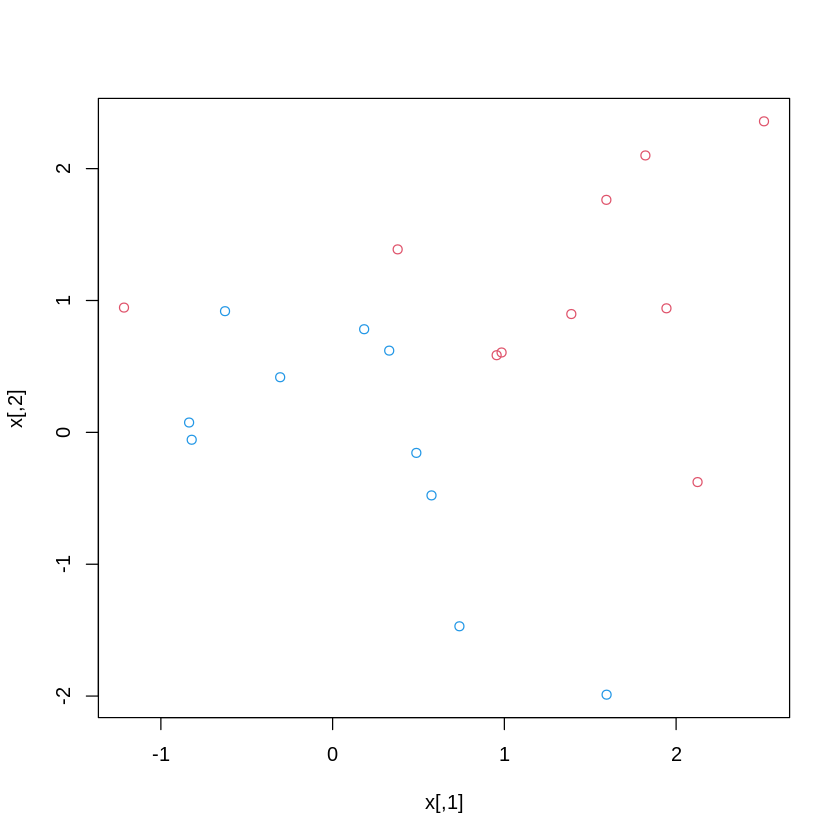

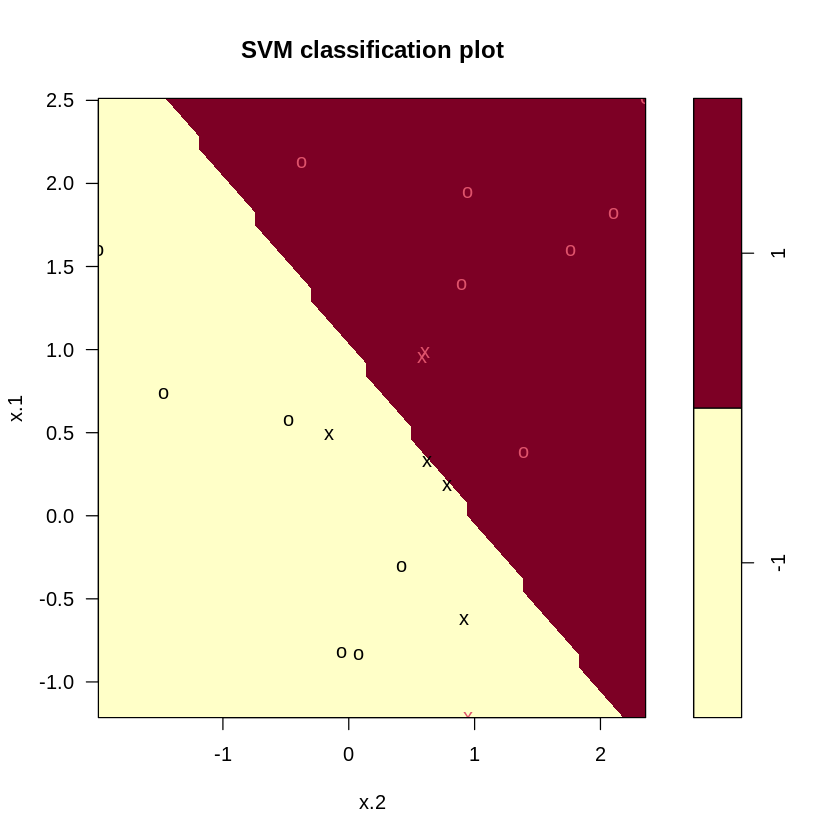

In [2]:
library(e1071)
set.seed (1)
# We now use the svm() function to fit the support vector classifier for a given value of the cost parameter.
# Here we demonstrate the use of this function on a two-dimensional example so that we can plot the resulting
# decision boundary.
# We begin by generating the observations, which belong to two classes.
x=matrix(rnorm(20*2), ncol=2)
y=c(rep(-1,10), rep(1,10))
x[y==1,]=x[y==1,] + 1
x
y
# We begin by checking whether the classes are linearly separable.
plot(x, col=(3-y))
# They are not. Next, we fit the support vector classifier.
# Note that in order for the svm() function to perform classification
# we must encode the response as a factor variable.
# We now create a data frame with the response coded as a factor.
dat <- data.frame(x = x,y = as.factor(y))
svmfit <- svm(y ~., data=dat, kernel="linear", cost=10,scale=FALSE)
# The argument scale=FALSE tells the svm() function not to scale each feature to
# have mean zero or standard deviation one;
# depending on the application, one might prefer to use scale=TRUE.
# We can now plot the support vector classifier obtained:
plot(svmfit , dat)
# Note that the two arguments to the plot.svm() function are the output of the call to svm(),
#as well as the data used in the call to svm().
# The region of feature space that will be assigned to the −1 class is shown in light blue,
# and the region that will be assigned to the +1 class is shown in purple.

[1]  1  2  3  4  5  7  9 10 12 13 14 15 16 17 18 20

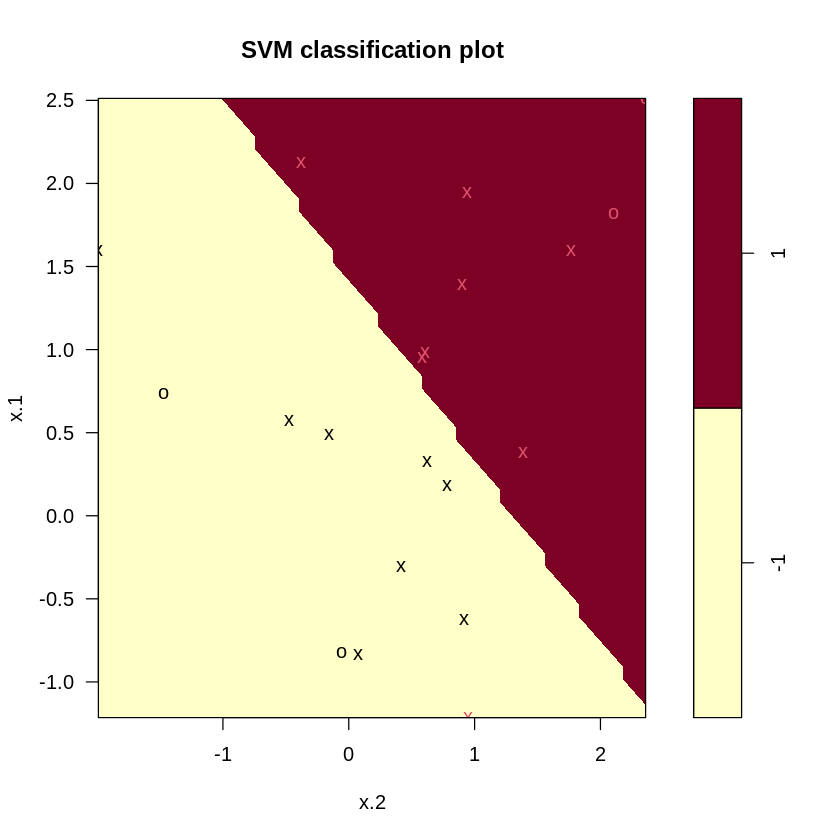

In [3]:
svmfit <- svm(y ~., data=dat, kernel="linear", cost = 0.1, scale=FALSE)
plot(svmfit , dat)
svmfit$index


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  0.1

- best performance: 0.05 

- Detailed performance results:
   cost error dispersion
1 1e-03  0.55  0.4377975
2 1e-02  0.55  0.4377975
3 1e-01  0.05  0.1581139
4 1e+00  0.15  0.2415229
5 5e+00  0.15  0.2415229
6 1e+01  0.15  0.2415229
7 1e+02  0.15  0.2415229



Call:
best.tune(METHOD = svm, train.x = y ~ ., data = dat, ranges = list(cost = c(0.001, 
    0.01, 0.1, 1, 5, 10, 100)), kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.1 

Number of Support Vectors:  16

 ( 8 8 )


Number of Classes:  2 

Levels: 
 -1 1




       truth
predict -1 1
     -1  9 1
     1   2 8

       truth
predict -1  1
     -1 11  6
     1   0  3

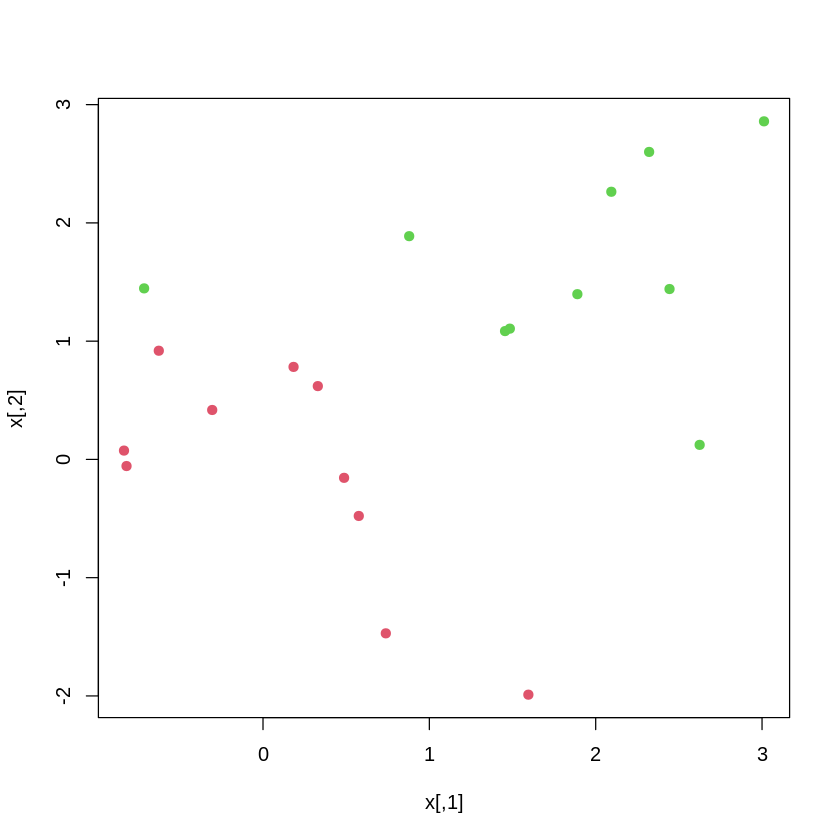

In [4]:
set.seed (1)
tune.out <- tune(svm, y ~.,data=dat,kernel="linear", ranges=list(cost=c(0.001, 0.01, 0.1, 1,5,10,100)))
# We can easily access the cross-validation errors for each of these models using the summary() command:
summary(tune.out)
# We see that cost=0.1 results in the lowest cross-validation error rate.
# The tune() function stores the best model obtained, which can be accessed as follows:
bestmod=tune.out$best.model
summary(bestmod)
# The predict() function can be used to predict the class label on a set of test observations,
# at any given value of the cost parameter. We begin by generating a test data set.
xtest=matrix(rnorm(20*2), ncol=2)
ytest=sample(c(-1,1), 20, rep=TRUE)
xtest[ytest==1,]=xtest[ytest==1,] + 1
testdat=data.frame(x=xtest, y=as.factor(ytest))
# Now we predict the class labels of these test observations.
# Here we use the best model obtained through cross-validation in order to make predictions.
ypred <-predict(bestmod ,testdat)
table(predict=ypred, truth=testdat$y)
#Thus, with this value of cost, 19 of the test observations are correctly classified.
# What if we had instead used cost= 0.01?
svmfit <- svm(y~., data=dat, kernel="linear", cost=.01, scale=FALSE)
ypred=predict(svmfit ,testdat)
table(predict=ypred, truth=testdat$y)
# In this case one additional observation is misclassified.
# Now consider a situation in which the two classes are linearly separable.
# Then we can find a separating hyperplane using the svm() function.
# We first further separate the two classes in our simulated data so that they are linearly separable:
x[y==1,]=x[y==1,]+0.5
plot(x, col=(y+5)/2, pch=19)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 1e+05)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1e+05 

Number of Support Vectors:  3

 ( 1 2 )


Number of Classes:  2 

Levels: 
 -1 1





Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  7

 ( 4 3 )


Number of Classes:  2 

Levels: 
 -1 1




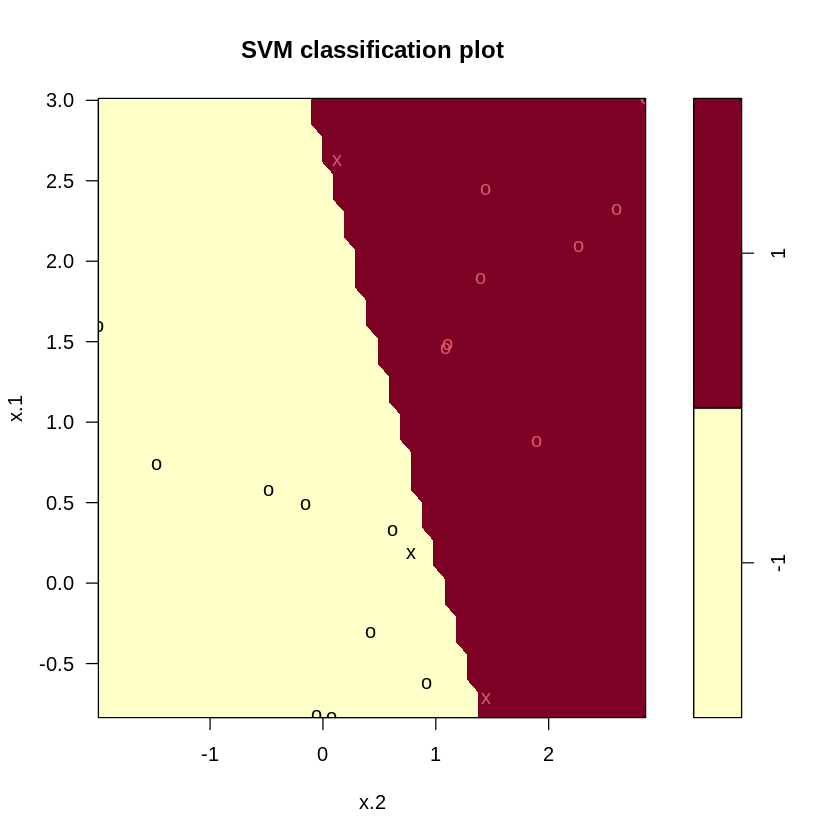

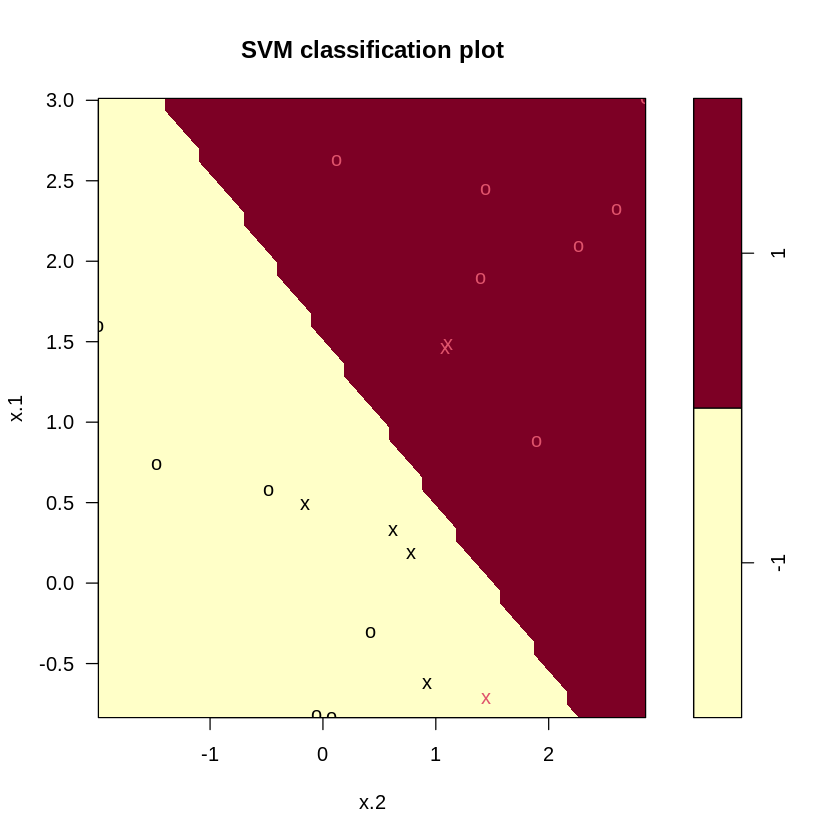

In [6]:
 #Now the observations are just barely linearly separable.
# We fit the support vector classifier and plot the resulting hyperplane,
# using a very large value of cost so that no observations are misclassified.
dat=data.frame(x=x,y=as.factor(y))
svmfit <-svm(y~., data=dat, kernel="linear", cost=1e5)
summary(svmfit)
plot(svmfit,dat)
# No training errors were made and only three support vectors were used.
# However, we can see from the figure that the margin is
# very narrow (because the observations that are not support vectors, indicated as circles, are very
# close to the decision boundary). It seems likely that this model will perform poorly on test data.
# We now try a smaller value of cost:
svmfit <- svm(y~., data=dat, kernel="linear", cost=1)
summary(svmfit)
plot(svmfit ,dat)
# Using cost=1, we misclassify a training observation, but we also obtain a much wider margin and make
# use of seven support vectors.
# It seems likely that this model will perform better on test data than the model with cost=1e5.

In [8]:
 #We now examine the Khan data set, which consists of a number of tissue samples
# corresponding to four distinct types of small round blue cell tumors
# For each tissue sample, gene expression measurements are available.
#The data set consists of training data, xtrain and ytrain, and testing data, xtest and ytest.
install.packages("ISLR")
library(e1071)
library(ISLR)
names(Khan)
# Let's examine the dimension of the data:
# This data set consists of expression measurements for 2,308 genes.
# The training and test sets consist of 63 and 20 observations respectively
dim(Khan$xtrain )
dim(Khan$xtest )
length(Khan$ytrain )
length(Khan$ytest )
table(Khan$ytrain )
table(Khan$ytest )
# We will use a support vector approach to predict cancer subtype using gene expression measurements.
# In this data set, there are a very large number of features relative to the number of observations.
# This suggests that we should use a linear kernel, because the additional flexibility that will
# result from using a polynomial or radial kernel is unnecessary.
dat <- data.frame(x=Khan$xtrain , y = as.factor(Khan$ytrain ))
out <- svm(y ~., data=dat, kernel="linear",cost=10)
summary(out)
# We see that there are no training errors. In fact, this is not surprising, because the large number
# of variables relative to the number of observations implies that it is easy to find hyperplanes that
# fully separate the classes.
# We are most interested not in the support vector classifier’s performance on the training observations,
# but rather its performance on the test observations.
dat.te=data.frame(x=Khan$xtest , y = as.factor(Khan$ytest ))
pred.te=predict(out, newdata=dat.te)
table(pred.te, dat.te$y)
# We see that using cost=10 yields two test set errors on this data

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] "xtrain" "xtest"  "ytrain" "ytest"

[1]   63 2308

[1]   20 2308

[1] 63

[1] 20


 1  2  3  4 
 8 23 12 20 


1 2 3 4 
3 6 6 5 


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 10)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 

Number of Support Vectors:  58

 ( 20 20 11 7 )


Number of Classes:  4 

Levels: 
 1 2 3 4




       
pred.te 1 2 3 4
      1 3 0 0 0
      2 0 6 2 0
      3 0 0 4 0
      4 0 0 0 5

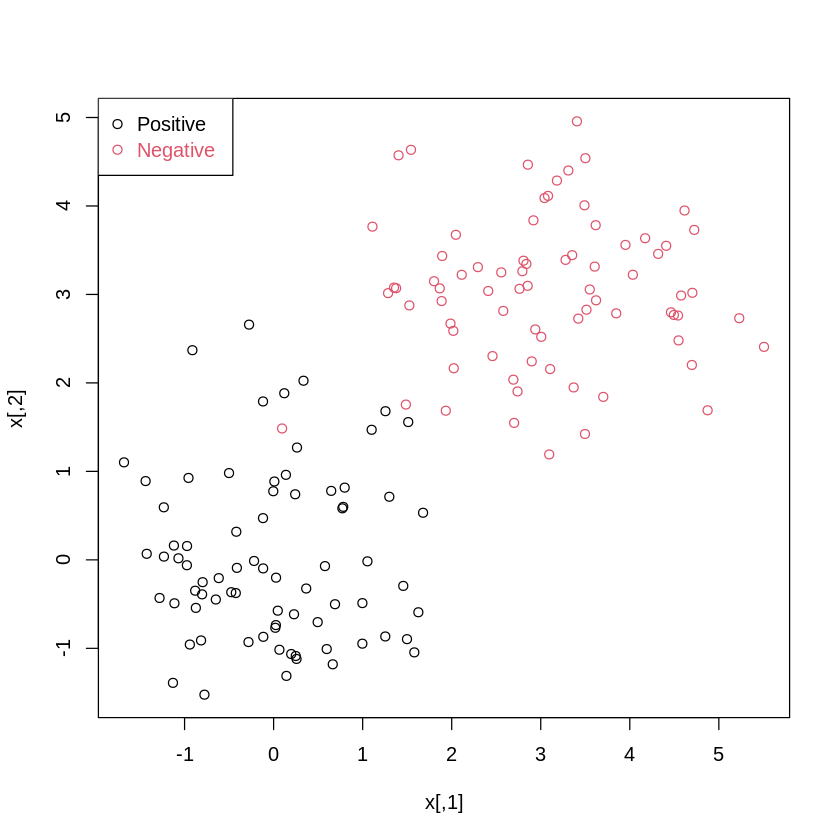

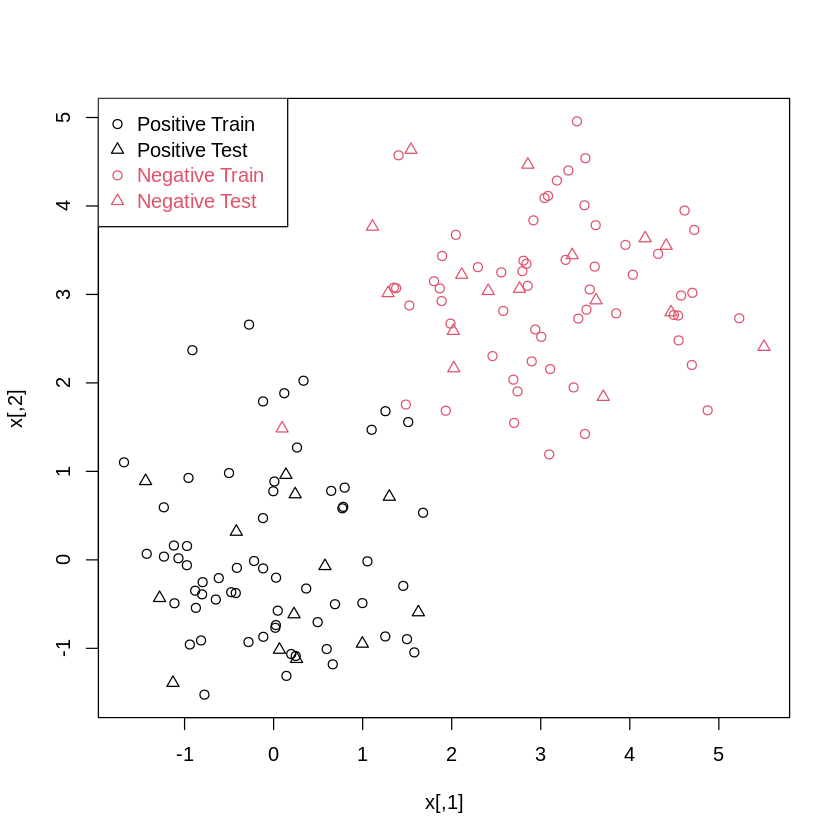

In [9]:
n <- 150 # number of data points
p <- 2 # dimension
sigma <- 1 # variance of the distribution
meanpos <- 0 # centre of the distribution of positive examples
meanneg <- 3 # centre of the distribution of negative examples
npos <- round(n/2) # number of positive examples
nneg <- n-npos # number of negative examples
# Generate the positive and negative examples
xpos <- matrix(rnorm(npos*p,mean=meanpos,sd=sigma),npos,p)
xneg <- matrix(rnorm(nneg*p,mean=meanneg,sd=sigma),npos,p)
x <- rbind(xpos,xneg)
# Generate the labels
y <- matrix(c(rep(1,npos),rep(-1,nneg)))
# Visualize the data
plot(x,col=ifelse(y>0,1,2))
legend("topleft",c('Positive','Negative'),col=seq(2),pch=1,text.col=seq(2))
#
ntrain <- round(n*0.8) # number of training examples
tindex <- sample(n,ntrain) # indices of training samples
xtrain <- x[tindex,]
xtest <- x[-tindex,]
ytrain <- y[tindex]
ytest <- y[-tindex]
istrain=rep(0,n)
istrain[tindex]=1
# Visualize
plot(x,col=ifelse(y>0,1,2),pch=ifelse(istrain==1,1,2))
legend("topleft",c('Positive Train','Positive Test','Negative Train','Negative Test'),col=c(1,1,2,2), pch=c(1,2,1,2), text.col=c(1,1,2,2))




Call:
svm.default(x = x, y = y)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  51




Call:
svm.default(x = x, y = y)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  51

 ( 8 22 21 )


Number of Classes:  3 

Levels: 
 setosa versicolor virginica




            y
pred         setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         48         2
  virginica       0          2        48

,setosa/versicolor,setosa/virginica,versicolor/virginica
1,1.196152,1.091757,0.6708810
2,1.064621,1.056185,0.8483518
3,1.180842,1.074542,0.6439798
4,1.110699,1.053012,0.6782041


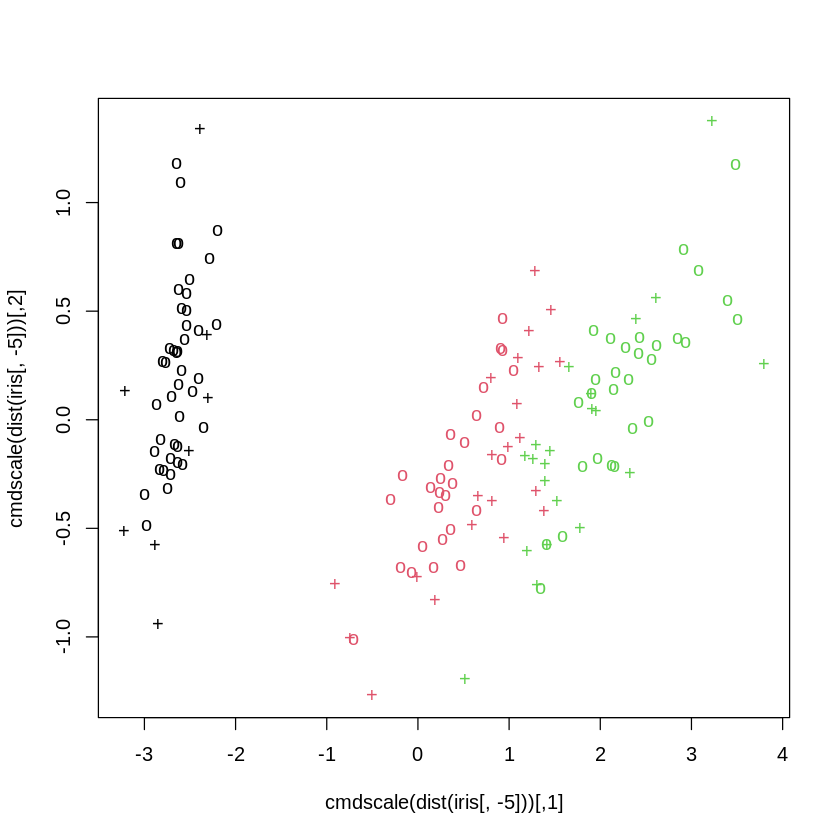

1     2 
 TRUE FALSE

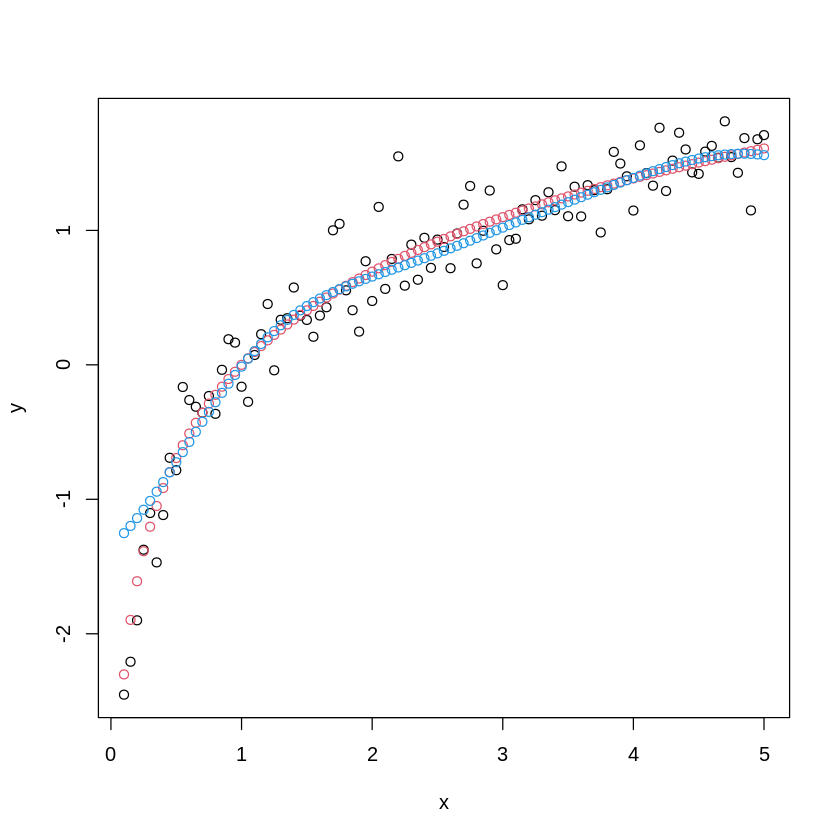

setosa versicolor 
        50        100


    setosa versicolor 
         2          1 

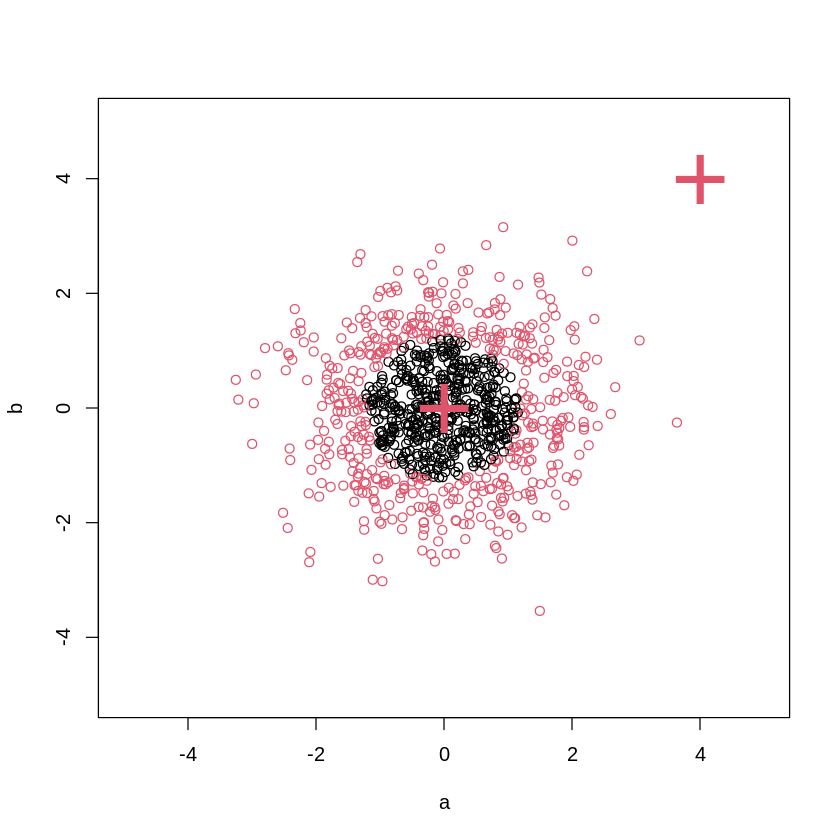

In [10]:
data(iris)
attach(iris)

## classification mode
# default with factor response:
model <- svm(Species ~ ., data = iris)

# alternatively the traditional interface:
x <- subset(iris, select = -Species)
y <- Species
model <- svm(x, y)

print(model)
summary(model)

# test with train data
pred <- predict(model, x)
# (same as:)
pred <- fitted(model)

# Check accuracy:
table(pred, y)

# compute decision values and probabilities:
pred <- predict(model, x, decision.values = TRUE)
attr(pred, "decision.values")[1:4,]

# visualize (classes by color, SV by crosses):
plot(cmdscale(dist(iris[,-5])),
     col = as.integer(iris[,5]),
     pch = c("o","+")[1:150 %in% model$index + 1])

## try regression mode on two dimensions

# create data
x <- seq(0.1, 5, by = 0.05)
y <- log(x) + rnorm(x, sd = 0.2)

# estimate model and predict input values
m   <- svm(x, y)
new <- predict(m, x)

# visualize
plot(x, y)
points(x, log(x), col = 2)
points(x, new, col = 4)

## density-estimation

# create 2-dim. normal with rho=0:
X <- data.frame(a = rnorm(1000), b = rnorm(1000))
attach(X)

# traditional way:
m <- svm(X, gamma = 0.1)

# formula interface:
m <- svm(~., data = X, gamma = 0.1)
# or:
m <- svm(~ a + b, gamma = 0.1)

# test:
newdata <- data.frame(a = c(0, 4), b = c(0, 4))
predict (m, newdata)

# visualize:
plot(X, col = 1:1000 %in% m$index + 1, xlim = c(-5,5), ylim=c(-5,5))
points(newdata, pch = "+", col = 2, cex = 5)

# weights: (example not particularly sensible)
i2 <- iris
levels(i2$Species)[3] <- "versicolor"
summary(i2$Species)
wts <- 100 / table(i2$Species)
wts
m <- svm(Species ~ ., data = i2, class.weights = wts)


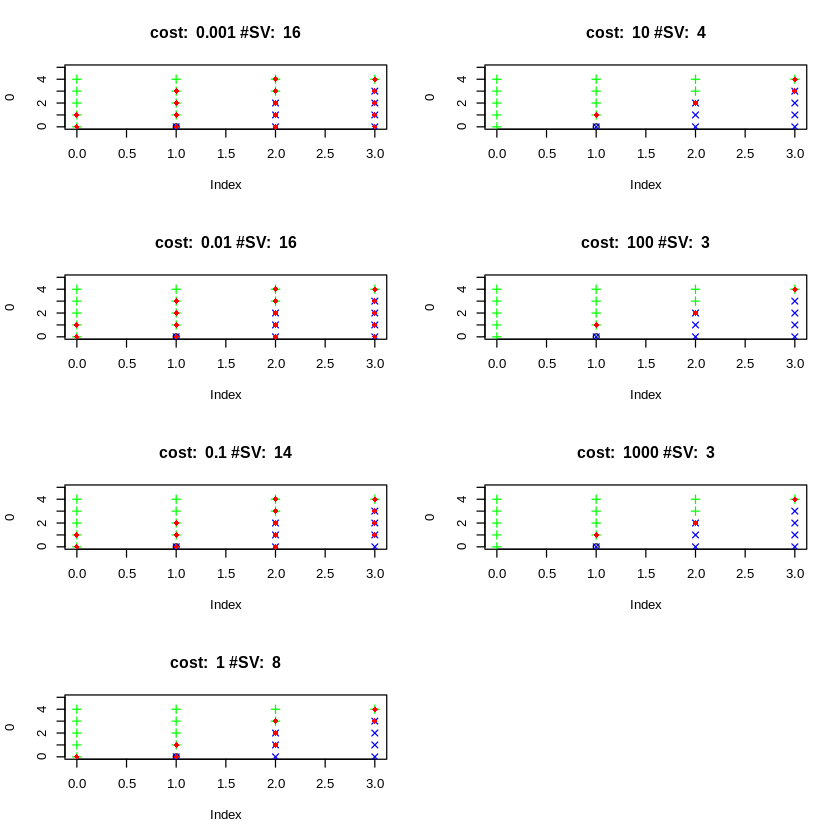

In [11]:
library(e1071)
m1 <- matrix( c(
0,    0,    0,    1,    1,    2,     1, 2,    3,    2,    3, 3, 0, 1,2,3,
0, 1, 2, 3,
1,    2,    3,    2,    3,    3,     0, 0,    0,    1, 1, 2, 4, 4,4,4,    0,
1, 2, 3,
1,    1,    1,    1,    1,    1,    -1,-1,  -1,-1,-1,-1, 1 ,1,1,1,     1,
1,-1,-1
), ncol = 3 )

Y = m1[,3]
X = m1[,1:2]

df = data.frame( X , Y )

par(mfcol=c(4,2))
for( cost in c( 1e-3 ,1e-2 ,1e-1, 1e0,  1e+1, 1e+2 ,1e+3)) {
#cost <- 1
model.svm <- svm( Y ~ . , data = df ,  type = "C-classification" , kernel =
"linear", cost = cost,
                         scale =FALSE )
#print(model.svm$SV)

plot(x=0,ylim=c(0,5), xlim=c(0,3),main= paste( "cost: ",cost, "#SV: ",
nrow(model.svm$SV) ))
points(m1[m1[,3]>0,1], m1[m1[,3]>0,2], pch=3, col="green")
points(m1[m1[,3]<0,1], m1[m1[,3]<0,2], pch=4, col="blue")
points(model.svm$SV[,1],model.svm$SV[,2], pch=18 , col = "red")
}


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



 Setting default kernel parameters  


Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 100 

Linear (vanilla) kernel function. 

Number of Support Vectors : 3 

Objective Function Value : -83.3392 
Training error : 0 

$param
$param$C
[1] 100


$scaling
`\001NULL\001`

$coef
$coef[[1]]
[1]  78.294374 -83.301146   5.006772


$alphaindex
$alphaindex[[1]]
[1] 32 81 87


$b
[1] -28.34212

$obj
[1] -83.33923

$SVindex
[1] 32 81 87

$nSV
[1] 3

$prior
$prior[[1]]
$prior[[1]]$prior1
[1] 62

$prior[[1]]$prior0
[1] 58



$prob.model
$prob.model[[1]]
NULL


$alpha
$alpha[[1]]
[1] 78.294374 83.301146  5.006772


$type
[1] "C-svc"

$kernelf
Linear (vanilla) kernel function. 

$kpar
list()

$xmatrix
$xmatrix[[1]]
          X1       X2
32  1.511672 1.557370
81  1.485503 1.755448
87 -0.275778 2.658658


$ymatrix
  [1]  1 -1  1 -1 -1 -1  1 -1 -1  1  1  1 -1  1  1  1  1  1  1 -1 -1  1 -1  1  1
 [26] -1  1  1 -1 -1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1  1 -1  1  1
 [51]  1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1 -1 -1  1  1 -1  1  1  1  1 -1  1  1  1
 [76] -1 -1 -1 -1  1 -1  1  1 -1  1 -1  1 -1  1 -1  1  1  1 -1 -1  1  1 -1 -1 -1
[101] -1 -1  1  1  1  1 -1  1  1  1  1 -1 -1 -1  1  1 -1  1  1 -1

$fitted
  [1]  1 -1

[[1]]
[1] 78.294374 83.301146  5.006772

[[1]]
[1] 32 81 87

[1] -28.34212

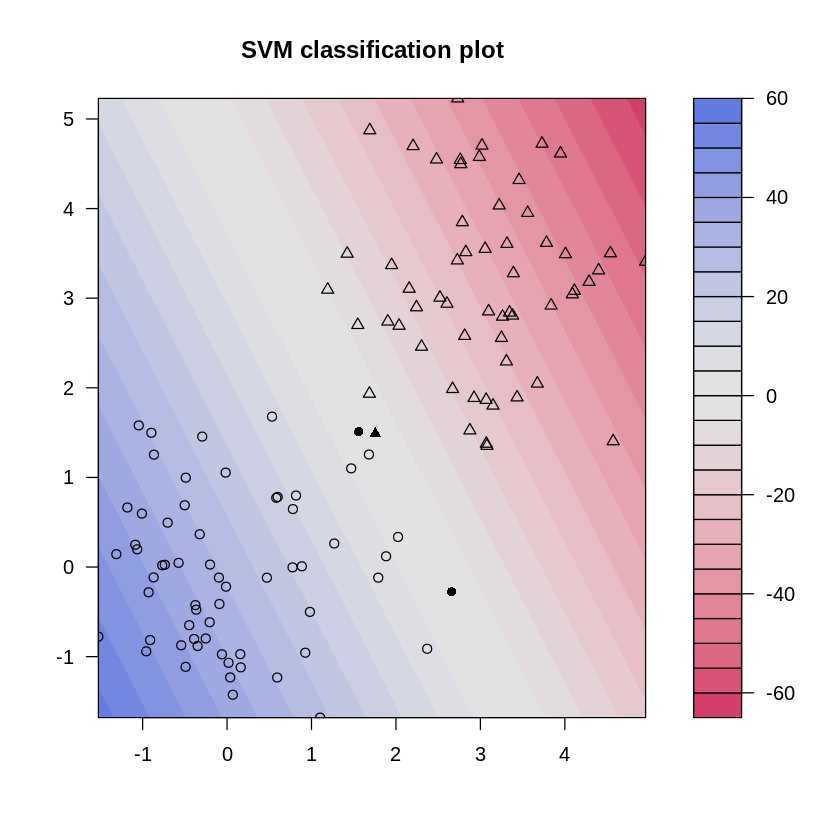

In [14]:
# load the kernlab package
install.packages("kernlab")
library(kernlab)
# train the SVM
svp <- ksvm(xtrain,ytrain,type="C-svc",kernel='vanilladot',C=100,scaled=c())
#Look and understand what svp contains
# General summary
svp
# Attributes that you can access
attributes(svp)
# For example, the support vectors
alpha(svp)
alphaindex(svp)
b(svp)
# Use the built-in function to pretty-plot the classifier
plot(svp,data=xtrain)



In [18]:
#### Use text with string kernels
data(reuters)
is(reuters)
tsv <- ksvm(reuters,rlabels,kernel="stringdot",
            kpar=list(length=5),cross=3,C=10)
tsv



[1] "list"       "vector"     "listOrNULL" "input"      "listI"     
[6] "lpinput"    "output"

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 10 

String kernel function.  Type =  spectrum 
 Hyperparameters : sub-sequence/string length =  5 
 Normalized 

Number of Support Vectors : 39 

Objective Function Value : -13.6834 
Training error : 0 
Cross validation error : 0.128205 

In [19]:
#### Use custom kernel

k <- function(x,y) {(sum(x*y) +1)*exp(-0.001*sum((x-y)^2))}
class(k) <- "kernel"

data(promotergene)

## train svm using custom kernel
gene <- ksvm(Class~.,data=promotergene[c(1:20, 80:100),],kernel=k,
             C=5,cross=5)

gene


Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 5 


Number of Support Vectors : 41 

Objective Function Value : -0.5191 
Training error : 0 
Cross validation error : 0.119444 

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 1 

[1] " Kernel matrix used as input."

Number of Support Vectors : 4 

Objective Function Value : -2.031 
Training error : 0 

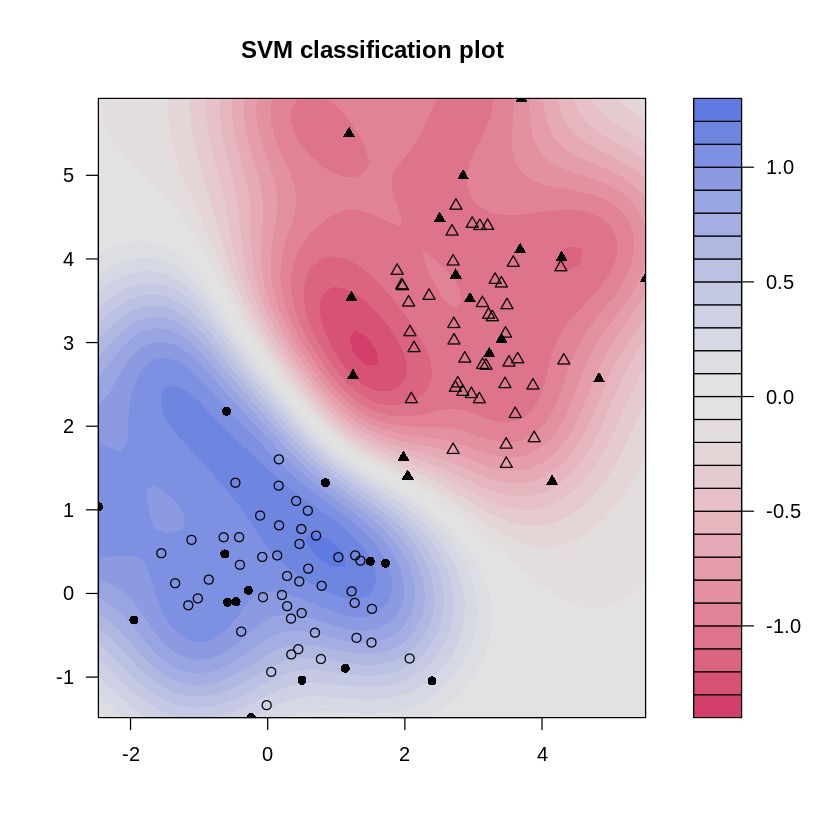

In [21]:
## Demo of the plot function
x <- rbind(matrix(rnorm(120),,2),matrix(rnorm(120,mean=3),,2))
y <- matrix(c(rep(1,60),rep(-1,60)))

svp <- ksvm(x,y,type="C-svc")
plot(svp,data=x)


### Use kernelMatrix
K <- as.kernelMatrix(crossprod(t(x)))

svp2 <- ksvm(K, y, type="C-svc")

svp2



In [23]:
 ## example using the promotergene data set
 data(promotergene)

 ## create test and training set
 ind <- sample(1:dim(promotergene)[1],20)
 genetrain <- promotergene[-ind, ]
 genetest <- promotergene[ind, ]

 ## train a support vector machine
 gene <-  ksvm(Class~.,data=genetrain,kernel="rbfdot",kpar=list(sigma=0.015),C=70,cross=4,prob.model=TRUE)

 ## predict gene type probabilities on the test set
 genetype <- predict(gene,genetest,type="probabilities")


In [24]:
data(spam)

## create test and training set
index <- sample(1:dim(spam)[1])
spamtrain <- spam[index[1:floor(dim(spam)[1]/2)], ]
spamtest <- spam[index[((ceiling(dim(spam)[1]/2)) + 1):dim(spam)[1]], ]

## train a support vector machine
filter <- ksvm(type~.,data=spamtrain,kernel="rbfdot",
               kpar=list(sigma=0.05),C=5,cross=3)
filter

## predict mail type on the test set
mailtype <- predict(filter,spamtest[,-58])

## Check results
table(mailtype,spamtest[,58])




Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 5 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.05 

Number of Support Vectors : 933 

Objective Function Value : -1080.843 
Training error : 0.019565 
Cross validation error : 0.090864 

         
mailtype  nonspam spam
  nonspam    1321  138
  spam         57  784

In [25]:
## Another example with the famous iris data
data(iris)

## Create a kernel function using the build in rbfdot function
rbf <- rbfdot(sigma=0.1)
rbf

## train a bound constraint support vector machine
irismodel <- ksvm(Species~.,data=iris,type="C-bsvc",
                  kernel=rbf,C=10,prob.model=TRUE)

irismodel

## get fitted values
fitted(irismodel)

## Test on the training set with probabilities as output
predict(irismodel, iris[,-5], type="probabilities")




new("rbfkernel", .Data = function (x, y = NULL) 
{
    if (!is(x, "vector")) 
        stop("x must be a vector")
    if (!is(y, "vector") && !is.null(y)) 
        stop("y must a vector")
    if (is(x, "vector") && is.null(y)) {
        return(1)
    }
    if (is(x, "vector") && is(y, "vector")) {
        if (!length(x) == length(y)) 
            stop("number of dimension must be the same on both data points")
        return(exp(sigma * (2 * crossprod(x, y) - crossprod(x) - 
            crossprod(y))))
    }
}, kpar = list(sigma = 0.1))
<bytecode: 0x596207a70138>
<environment: 0x596207860810>
attr(,"kpar")
attr(,"kpar")$sigma
[1] 0.1

attr(,"class")
[1] "rbfkernel"
attr(,"class")attr(,"package")
[1] "kernlab"

Support Vector Machine object of class "ksvm" 

SV type: C-bsvc  (classification) 
 parameter : cost C = 10 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.1 

Number of Support Vectors : 32 

Objective Function Value : -5.8442 -3.0652 -136.9786 
Training error : 0.02 
Probability model included. 

[1] setosa     setosa     setosa     setosa     setosa     setosa    
  [7] setosa     setosa     setosa     setosa     setosa     setosa    
 [13] setosa     setosa     setosa     setosa     setosa     setosa    
 [19] setosa     setosa     setosa     setosa     setosa     setosa    
 [25] setosa     setosa     setosa     setosa     setosa     setosa    
 [31] setosa     setosa     setosa     setosa     setosa     setosa    
 [37] setosa     setosa     setosa     setosa     setosa     setosa    
 [43] setosa     setosa     setosa     setosa     setosa     setosa    
 [49] setosa     setosa     versicolor versicolor versicolor versicolor
 [55] versicolor versicolor versicolor versicolor versicolor versicolor
 [61] versicolor versicolor versicolor versicolor versicolor versicolor
 [67] versicolor versicolor versicolor versicolor versicolor versicolor
 [73] virginica  versicolor versicolor versicolor versicolor virginica 
 [79] versicolor versicolor versicolor versicolor versicolor virginica 
 [85] versicolor versicolor versicolor versicolor versicolor versicolor
 [91] versicolor versicolor versicolor versicolor versicolor versicolor
 [97] versicolor versicolor versicolor versicolor virginica  virginica 
[103] virginica  virginica  virginica  virginica  virginica  virginica 
[109] virginica  virginica  virginica  virginica  virginica  virginica 
[115] virginica  virginica  virginica  virginica  virginica  virginica 
[121] virginica  virginica  virginica  virginica  virginica  virginica 
[127] virginica  virginica  virginica  virginica  virginica  virginica 
[133] virginica  virginica  virginica  virginica  virginica  virginica 
[139] virginica  virginica  virginica  virginica  virginica  virginica 
[145] virginica  virginica  virginica  virginica  virginica  virginica 
Levels: setosa versicolor virginica

setosa,versicolor,virginica
0.9832054,0.010284731,0.006509908
0.9776561,0.014974060,0.007369811
0.9851049,0.008509131,0.006385945
0.9814537,0.011162433,0.007383863
0.9843718,0.009247558,0.006380605
0.9704855,0.020538147,0.008976318
0.9831909,0.009381810,0.007427265
0.9820190,0.011127268,0.006853773
0.9813495,0.011044453,0.007606030
0.9816097,0.011652437,0.006737888
